In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



# CoderHouse - Data Science

#### Tercera entrega - Marco Ormello - Comision: 32845

## Integracion de visualizaciones.

### Restaurant's cuisine ratings

##### El siguiente dataset contiene informacion de la situacion sociocultural y habitos de consumo de alcohol y tabaco de una muestra de personas y su relacion con la puntuacion que otorgaron a platos de diferentes categorias.

In [2]:
df = pd.read_csv('/workspaces/data-science/data/raw/Cuisine_rating.csv')
print(df.shape)
df.info()
df.head()


(200, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


##### Inicialmente haremos un analisis global del dataset para conocer cuales son las caracteristicas de nuestra muestra.

### Analisis general de la muestra.

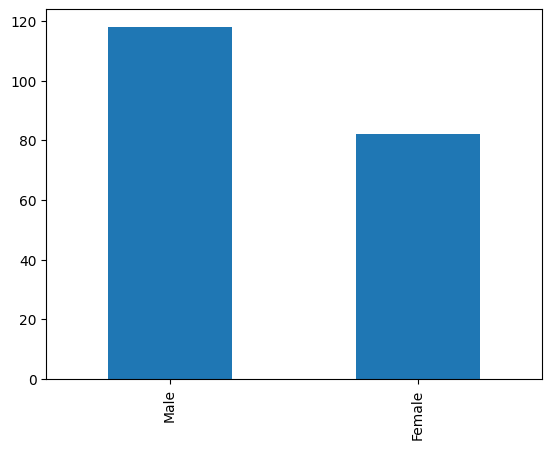

In [3]:
df['Gender'].value_counts().plot(kind='bar')
plt.show()

##### Los integrantes de esta muestra se consideran en su mayoria varones.

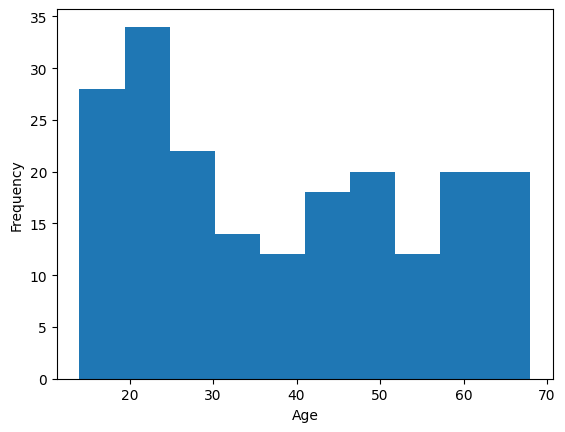

In [4]:
now = datetime.now()
df['Age'] = now.year - df['YOB']

# Crear histograma
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')

# Mostrar gráfico
plt.show()


##### Predominan las personas menores de 30 años en esta muestra.

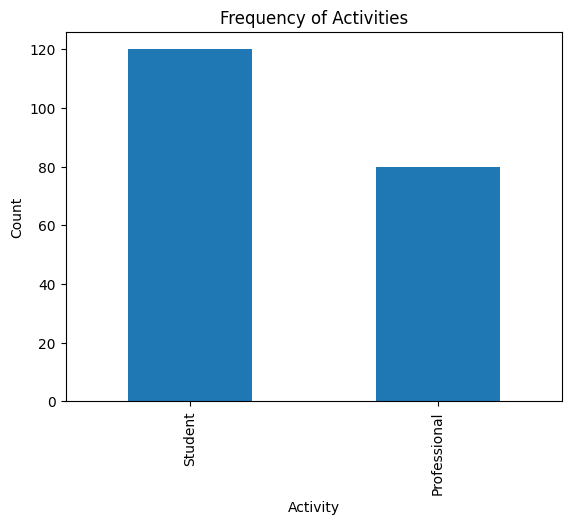

In [5]:
activity_counts = df['Activity'].value_counts()

# Crear el gráfico de barras
activity_counts.plot(kind='bar')

# Agregar etiquetas al gráfico
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Frequency of Activities')

# Mostrar el gráfico
plt.show()

##### En su mayoria son estudiantes.

### Hipotesis:
##### Existe una relacion entre factores socioculturales, economicos y habitos de vida que sirven para clasificar en grupos a las personas y predecir sus gustos culinarios.

##### Haremos una primera aproximacion para evaluar cuales son los factores socioculturales con mayor relacion a diferentes gustos gastronomicos y al mismo tiempo su influencia en el rating que otorgaron.

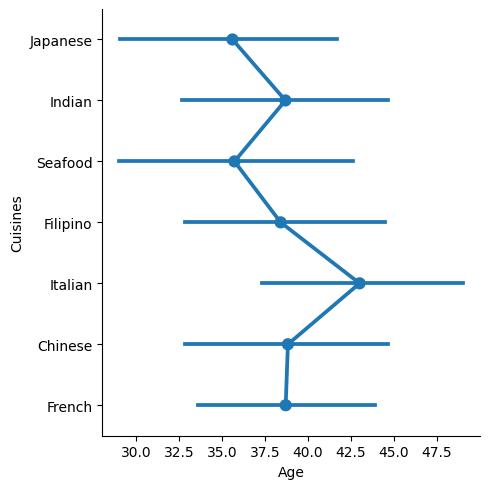

In [6]:
# Crear gráfico de líneas con edad en x y cocina en y
sns.catplot(x='Age', y='Cuisines', kind="point", data=df)

# Mostrar gráfico
plt.show()

##### Este grafico de tipo CatPlot representa la magnitud y el promedio de la contabilizacion de elecciones de preferencias gastronomicas segun la edad del entrevistado. Inicialmente podemos obtener como referencia que las personas de mayor edad prefieren la comida italiana y los mas jovenes prefieren la comida japonesa.

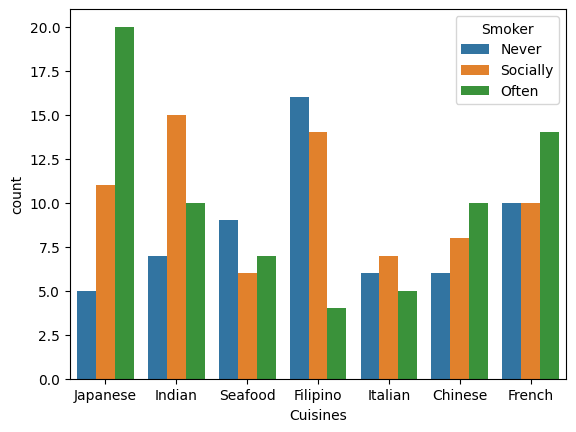

In [7]:
sns.countplot(x='Cuisines', hue='Smoker', data=df)

# Mostrar gráfico
plt.show()


##### Al mismo tiempo podemos observar en este grafico que los fumadores habituales prefieren la comida japonesa, los sociales la comida india y los no fumadores la filipina.

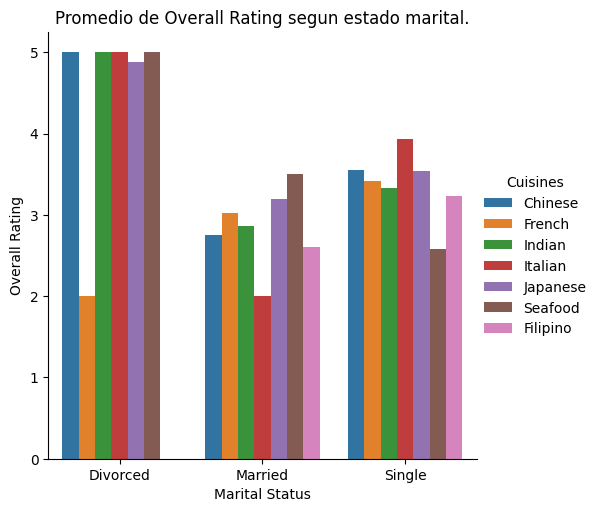

In [8]:
df_grouped = df.groupby(['Marital Status', 'Cuisines'])['Overall Rating'].mean().reset_index(name='mean_rating')

# Crear el gráfico de barras apiladas
sns.catplot(x='Marital Status', y='mean_rating', hue='Cuisines', kind='bar', data=df_grouped)

# Agregar etiquetas al gráfico
plt.xlabel('Marital Status')
plt.ylabel('Overall Rating')
plt.title('Promedio de Overall Rating segun estado marital.')

# Mostrar el gráfico
plt.show()



##### Este grafico evidencia que las personas divorciadas tienden a dar mayores Overal Ratings, es decir mejores puntuaciones globales, sea cual sea su preferencia gastronomica.

##### En esta primera aproximacion global a este data frame, podemos comenzar a dilucidar la posibilidad de realizar un analisis que nos premita encontrar grupos socioeconomicos con caracteristicas particulares que pueden estar relacionados con diferentes tipos de cocina. Ademas podremos continuar analizando en mayor profundidad si existen factores que se relacionen con personas que en general otorgan mejores o peores puntajes.
##### Este tipo de analisis permitiria entonces tambien realizar predicciones estadisticas de cual seria la comida que deberiamos recomendar segun las caracteristicas individuales de una persona. Podriamos utilizar un modelo como este con objetivos comerciales, para sistemas de anuncios publicitarios gastronomicos dirigidos por ejemplo.